# Randomized Optimization

In [1]:
import mlrose
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [6]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.Queens()

In [7]:
# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize=False, max_val=8)

In [8]:
# Define decay schedule
schedule = mlrose.ExpDecay()

In [9]:

# Solve using simulated annealing - attempt 1         
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                      max_iters = 1000, init_state = init_state,
                                                      random_state = 1)

In [10]:
print('The best state found is: ', best_state)


The best state found is:  [6 4 7 3 6 2 5 1]


In [11]:
print('The fitness at the best state is: ', best_fitness)


The fitness at the best state is:  2.0


In [12]:

# Solve using simulated annealing - attempt 2
best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                      max_iters = 1000, init_state = init_state,
                                                      random_state = 1)

In [13]:
print('The best state found is: ', best_state)


The best state found is:  [4 1 3 5 7 2 0 6]


In [14]:
print(best_fitness)


0.0


# TSP

In [3]:
# Generate points for TSP
import random
N = 50
length = 50
coords_list =[(random.randrange(0, N), random.randrange(0, N)) for i in range(length)]

schedule = mlrose.ExpDecay()

from mlrose.fitness import TravellingSales
import math

class TravellingSalesMax(TravellingSales):
    def evaluate(self, state):
        result = super().evaluate(state)
        return result * -1

fitness_coords = TravellingSalesMax(coords = coords_list)
problem_fit_max = mlrose.TSPOpt(length = length, fitness_fn = fitness_coords,
                            maximize=True)

max_iteration = 2000
max_attempts = 100

init_state=np.arange(length)
fitness_scores = {
    'hc': [],
    'sa': [],
    'ga': [],
    'mimic': [],
}

print(max_iteration)

print(fitness_scores)
print(init_state)

best_state, best_fitness, curve  = mlrose.random_hill_climb(problem_fit_max, max_attempts=max_attempts, 
                                                            max_iters=max_iteration, 
                                                            init_state=np.arange(length), curve=True, random_state=1)
fitness_scores['hc']=curve
print(best_fitness)

print(init_state)
best_state, best_fitness, curve = mlrose.simulated_annealing(problem_fit_max, schedule = schedule,curve=True,
                                                          max_attempts=max_attempts, max_iters=max_iteration,
                                                          init_state=init_state, random_state = 1)
fitness_scores['sa'] = curve
print(best_fitness)

best_state, best_fitness, curve = mlrose.genetic_alg(problem_fit_max, random_state=1, mutation_prob=0.3,
                                                     curve=True, max_attempts=max_attempts, max_iters=max_iteration)
fitness_scores['ga']=curve
print(best_fitness)

best_state, best_fitness, curve = mlrose.mimic(problem_fit_max, max_attempts=max_attempts, max_iters=max_iteration,
                                          random_state = 1, curve=True)
fitness_scores['mimic']=curve
print(best_fitness)

import matplotlib.pyplot as plt

def plot_chart(fitness, title, chart_name):
    plt.style.use('seaborn-whitegrid')
    plt.xlabel('fitness function', fontsize=10)
    plt.ylabel('number of iteration', fontsize=10)
    plt.title(title)
    print(len(fitness))
    for key in fitness.keys():
        print(key)
        plt.plot(fitness[key], label=key)
    plt.legend(loc='lower right')
    plt.savefig(chart_name, dpi=200)
    plt.show()
    plt.close()
    


2000
{'hc': [], 'sa': [], 'ga': [], 'mimic': []}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
-507.331941002838
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
-549.0154714647688
-475.4478417619175
-1048.6383291100785
4
hc
sa
ga
mimic


<Figure size 640x480 with 1 Axes>

## plot

4
hc
sa
ga
mimic


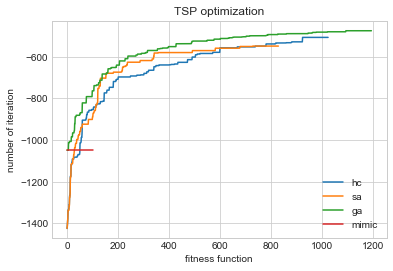

In [4]:
plot_chart(fitness_scores,"TSP optimization", 'TSP_optimization')
